<h2>INTEGRAL Observations of Classical Novae</h2>

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

<h3>Reading in our catalogue file:</h3>

In [2]:
data_frame = pd.read_csv('INTEGRAL_novae_wTimes.csv')

In [3]:
data_frame

,Unnamed: 0,Unnamed: 0.1,ID,Name,Other Name,Ra (deg),Dec (deg),l (deg),b (deg),Outburst Year,...,E(B-V) (mag),E(B-V) Err. (mag),_r (arcsec),mode dist (pc),median dist (pc),infimum (pc),supremum (pc),Name.1,MJD,IJD
0,0,0,225,V3890 Sgr,N Sgr 1962,277.680000,-24.01900,9.204000,-6.44300,"1962, 1990",...,0.900 ± 0.300,NaN,0.092,4218.0,4880.5,3024.1,8722.3,V3890 Sgr,NaN,NaN
1,1,1,54,V394 CrA,N CrA 1949,270.108000,-39.01000,352.822000,-7.72300,"1949, 1987",...,: 0.200,NaN,0.908,3225.0,4131.6,1973.9,8709.5,V394 CrA,NaN,NaN
2,2,2,172,V745 Sco,NaN,268.842000,-33.25000,357.358000,-3.99900,"1937, 1989",...,1.000 ± 0.200,NaN,0.107,NaN,NaN,NaN,NaN,V745 Sco,NaN,NaN
3,3,3,101,IM Nor,N Nor 1920,234.861000,-52.32200,327.098000,2.48500,"1920, 2002",...,0.800 ± 0.200,NaN,0.113,1311.7,2290.2,907.6,6533.6,IM Nor,NaN,NaN
4,4,4,3,CI Aql,NaN,283.015000,-1.47700,31.688000,-0.81200,"1917, 1941, 2000",...,0.920 ± 0.220,NaN,0.166,3061.8,3227.9,2532.3,4470.4,CI Aql,NaN,NaN
5,5,5,113,V2487 Oph,N Oph 1998,262.999000,-19.23200,6.604000,7.77500,"1900, 1998",...,0.400 ± 0.080,NaN,0.124,5035.1,5780.1,3494.4,10176.8,V2487 Oph,NaN,NaN
6,6,6,105,RS Oph,N Oph 1898,267.555000,-6.70800,19.800000,10.37200,"1898, 1907, 1933, 1945, 1958, 1967, 1985, 2006",...,0.730 ± 0.100,NaN,0.625,2263.0,2332.1,1935.4,2936.7,RS Oph,NaN,NaN
7,7,7,147,T Pyx,N Pyx 1890,136.173000,-32.38000,257.207000,9.70700,"1890, 1902, 1920, 1944, 1967",...,0.250 ± 0.020,NaN,0.038,3277.6,3413.8,2753.7,4500.7,T Pyx,NaN,NaN
8,8,8,56,T CrB,N CrB 1866,239.875000,25.92000,42.374000,48.16500,"1866, 1946",...,0.100 ± 0.080,NaN,0.199,824.6,827.3,775.7,96640.2,T CrB,NaN,NaN
9,9,9,150,U Sco,N Sco 1863,245.628000,-17.87800,357.669000,21.86900,"1863, 1906, 1917, 1936, 1945, 1969, 1979, 1987...",...,0.140 ± 0.120,NaN,0.313,NaN,NaN,NaN,NaN,U Sco,NaN,NaN


In [4]:
dist = data_frame['Dist. \n(kpc)'] # creating an array with nova distances

<h3>Defining indices which novae are chosen</h3>

In [5]:
good_novae = np.where(~np.isnan(data_frame['IJD']) & # no recurrent ones
                      (data_frame['Dist. \n(kpc)']+data_frame['Dist. Err. (kpc)'] < 25) & # inside Milky Way
                        ((data_frame['Var. type'] == 'N') | # different classical nova types
                         (data_frame['Var. type'] == 'NAa') | 
                         (data_frame['Var. type'] == 'NB') |
                         (data_frame['Var. type'] == 'NC') |
                         (data_frame['Var. type'] == 'NTS')))[0]

In [6]:
good_novae # all indices

array([ 10,  11,  12,  13,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  33,  34,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  56,  57,  59,  60,  61,  62,  63,  64,  65,  69,  71,
        72,  73,  75,  76,  77,  80,  81,  82,  83,  84,  85,  88,  93,
        94,  97,  98,  99, 100, 101, 102, 103, 104, 105, 109, 110, 111,
       112, 114, 116, 117, 119, 120, 121, 124, 125, 127, 129, 131, 134,
       135, 137, 138, 139, 141, 142, 144, 146, 147, 149, 152])

In [7]:
len(good_novae) # number of novae

102

<h3>Expectations:</h3>

In [8]:
Mej22 = 3e-9*u.Msun # ejected mass of 22Na
Mej07 = 1e-9*u.Msun # ejected mass of 7Be
p22 = 0.9994        # probability of gamma-ray emission at 1.275 MeV
p07 = 0.1052        # probability of gamma-ray emission at 0.478 MeV
m22 = 21.994437*u.u # atomic mass of 22Na
tau22 = 3.753*u.yr  # characteristic lifetime of 22Na (halflife / ln2)
m07 = 7.016929*u.u  # atomic mass of 7Be
tau07 = 76.66*u.d   # characteristic lifetime of 7Be

In [9]:
L022 = Mej22*p22/(m22*tau22) # canonical (intrinsic) luminosity of 22Na gamma-rays
L007 = Mej07*p07/(m07*tau07) # ... of 7Be gamma-rays

In [10]:
def exp_decay_flux_hard(t,T0,M,d,m,tau,p):
    """ returns flux as a function of time from a radioactive source (m,tau,p) of mass M at distance d
     T0 in d        occurrence time 
     M in 1e-9 Msun ejecta mass
     m in u         nuclei mass
     tau in d       decay time (T05/ln(2))
     t in d         time variable
     d in kpc       distance to object
     normalisation (u.Msun/(u.u*u.d*u.kpc**2)).to(1/u.s/u.cm**2) = 1455647780.4139435
    """
    N = 1.4556477804139435
    return N*M*p/(m*tau*4*np.pi*d**2)*np.exp(-(t-T0)/tau)*np.heaviside(t-T0,1)

In [11]:
def exp_decay_hard(t,T0,tau):
    """ returns exponential decay law normalised to one for given decay time
     T0 in d        occurrence time 
     tau in d       decay time (T05/ln(2))
     t in d         time variable
    """
    N = 1.0
    return N*np.exp(-(t-T0)/tau)*np.heaviside(t-T0,1)

<h3>Example of nearby and 'old' nova: index 98</h3>

In [12]:
idx = 98
print('Object name:                             ',data_frame['Name'][good_novae[idx]])
print('Outburst date:                           ',data_frame['Date (YYYY/MM/DD.DDDD)'][good_novae[idx]])
#print('Outburst date in INTEGRAL Julian Days (IJD)')
print('Outburst IJD:                            ',data_frame['IJD'][good_novae[idx]])

print('Object coordinates (l/b):                ',data_frame['l\n(deg)'][good_novae[idx]],data_frame['b\n(deg)'][good_novae[idx]])
print('Object distance (and uncertainty) [kpc]: ',data_frame['Dist. \n(kpc)'][good_novae[idx]],data_frame['Dist. Err. (kpc)'][good_novae[idx]])

Object name:                              V5113 Sgr
Outburst date:                            2003 09 17.52
Outburst IJD:                             1355.5199999999968
Object coordinates (l/b):                 3.721 -4.091
Object distance (and uncertainty) [kpc]:  0.95 0.21


(-349.95000000000005, 7348.95)

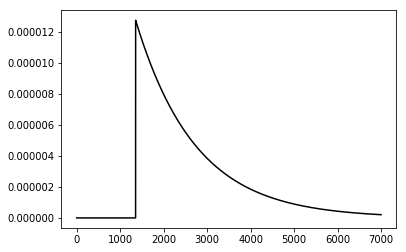

In [13]:
F_norm = (L022/(4*np.pi*(dist[good_novae[idx]]*u.kpc)**2)).to(1/(u.cm**2*u.s)).value # maximum flux at T = 0

tt = np.arange(0,7000,1) # array of times


plt.plot(exp_decay_hard(tt,
                         data_frame['IJD'][good_novae[idx]],
                         tau22.to(u.d).value)*F_norm,'k-');
plt.xlim()